JSON(JavaScript Object Notation)
- 경량의 DATA-교환 형식으로 사람이 읽고 쓰기에 용이하며, 기계가 분석하고 생성하기 용이함
- xml만큼은 아니지만 많이 보편화됨

객체(object)
- JSON에서 데이터를 표현하는 최소 단위
- {}(중괄호)로 묶여진 여러 개의 name(이름)과 value(값)의 쌍(pair)
  - 이름은 항상 string(문자열)이어야 함
  - 이름 / 값의 쌍은 :(콜론)으로 분리
  - 여러 개의 쌍은 ,(쉼표)로 분리
- 순서(order)는 고려하지 않음

배열(array)
- JSON 여러 개의 값을 묶어 배열로 표현할 수 있음
- 대괄호로 묶여진 여러 개의 값
  - 각 값은 ,(쉼표)로 분리
  - 값의 종류는 객체를 퐇마하므로, 객체로만 배열할 수 있음


값(value)
- 값으로 사용할 수 있는 자료형
  - str, number(int, fraction, exponenet), object, array, bool, null

문자열(string)
- ""(쌍 따옴표)로 묶여 있어야 함
- 문자열에 사용할 수 있는 기호
  - 따옴표, \, 각종 제어 문자를 제외한 표시 방법

숫자(nubmer)
- 음수 / 양수 모두 표기할 수 있음
- 정수는 0이 아닌 숫자로 시작하여, 0을 포함한 숫자로 끝남
- 실수는 정수에 소수점을 포함하여 숫자로 끝남
- 지수는 실수데 E 혹은 e를 포함하여 숫자로 끝남

공백(whitespace)
- 문자열의 공백이 아닌, JSON이 내부적으로 표현할 때 사용하는 공백
- 아무것도 없을 수 있음
- 띄어쓰기, 라인피드

스키마(Schema)
- 어떠한 구조
- 컴퓨터 공학에서 객체에 대한 자료형 / 구조를 의미하거나 표현할 때 사용
- Python에서 하나의 변수가 댜양한 자료형을 표현할 수 있듯이, JSON 또한 다양한 값을 표현할 수 있음
- 기기간 데이터 교환을 쉽게 할 수 있도록 제아한 JSON 특성 상, 잘못된 스키마 정의는 데이터 교환이 잘못될 수 있음


1. 실습 데이터 : 공공데이터 포털 - 오픈 API - 기상청_단기예보 ((구)_동네예보) 조회 서비스 활용 신청 후 사용

2. 승인 받은 후 개발 계정 상세보기에서 일반 인증키(Decoding) 사용

3. 상세기능에서 목록 선택 후 조희

4. 요청 변수는 내가 제공해야하는 값



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
#requests.get(url, pranms=None, **kwargs)
#url: GET 방식으로 전달하고자 하는 페이지 URL 주소
#paranms: 딕셔너리(dict)형, 튜플 / bytes형 또한 지원, 전달하려는 폼 내용

In [13]:
#URL 정보와 매개변수
#오픈 API의 '데이터셋' 메뉴 참조
url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst'

service_key = 'wAonAzTNv5ynPmEsjaEzjdheBBubBVL+E0Ss46tsYzdHeER+DyKdMYkVnITghr/BRjTXxZZtXzeh6czNGxUQ+Q=='

#요청 변수 입력, nx / ny 정보는 서울 중구 필동 기준
payload = {'serviceKey' : service_key, 'pageNo' : '1', 'numOfRows' : '1000', 'dataType' : 'JSON',
           'base_date' : '20220719', 'base_time' : '0500', 'nx' : '60', 'ny' : '127'}


In [14]:
#정보 요청 - 어디에 어떤걸 제출할지
reqs = requests.get(url, params=payload)

print(reqs.url) #요청한 URL 주소
print(reqs.status_code) #요청 결과, 정상이면 200 나옴

print(reqs.text) #JSON 내용
print((len(reqs.content))) #JSON의 길이

http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst?serviceKey=wAonAzTNv5ynPmEsjaEzjdheBBubBVL%2BE0Ss46tsYzdHeER%2BDyKdMYkVnITghr%2FBRjTXxZZtXzeh6czNGxUQ%2BQ%3D%3D&pageNo=1&numOfRows=1000&dataType=JSON&base_date=20220719&base_time=0500&nx=60&ny=127
200
{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"baseDate":"20220719","baseTime":"0500","category":"PTY","nx":60,"ny":127,"obsrValue":"0"},{"baseDate":"20220719","baseTime":"0500","category":"REH","nx":60,"ny":127,"obsrValue":"86"},{"baseDate":"20220719","baseTime":"0500","category":"RN1","nx":60,"ny":127,"obsrValue":"0"},{"baseDate":"20220719","baseTime":"0500","category":"T1H","nx":60,"ny":127,"obsrValue":"24.4"},{"baseDate":"20220719","baseTime":"0500","category":"UUU","nx":60,"ny":127,"obsrValue":"0.6"},{"baseDate":"20220719","baseTime":"0500","category":"VEC","nx":60,"ny":127,"obsrValue":"244"},{"baseDate":"20220719","baseTime":"0500","category":

In [15]:
#모듈 json
import json
print(json.dumps(json.loads(reqs.text), sort_keys=True, indent=4))

#메소드 load / loads 차이는 파일 / 문자열로부터 JSON 객체를 생성
#load(fp): 파일 fp(텍스트 or 바이너리)의 내용을 JSON 객체로 생성하여 반환 - dump(obj, fp)
#loads(s): 문자열 s의 내용을 JSON 객체로 생성하여 반환 - dumps(obj)
#dump / dumps 차는 객체를 파일 / 문자열로 생성

{
    "response": {
        "body": {
            "dataType": "JSON",
            "items": {
                "item": [
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "PTY",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "0"
                    },
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "REH",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "86"
                    },
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "RN1",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "0"
                    },
          

In [27]:
#JSON을 변환하여 Key 확인
load_json = json.loads(reqs.text)
print(load_json.keys())

#loads 메소드로 문자열을 json을 변경
print(type(reqs.text))
print(type(load_json))

dict_keys(['response'])
<class 'str'>
<class 'dict'>


In [28]:
#JSON을 DataFrame으로
df = pd.DataFrame(load_json)
df

,response
body,"{'dataType': 'JSON', 'items': {'item': [{'base..."
header,"{'resultCode': '00', 'resultMsg': 'NORMAL_SERV..."


In [22]:
#다시 JSON을 DataFrame으로
print(load_json['response']['body']['items']['item'][0])

df = pd.DataFrame(load_json['response']['body']['items']['item'])
df

{'baseDate': '20220719', 'baseTime': '0500', 'category': 'PTY', 'nx': 60, 'ny': 127, 'obsrValue': '0'}


,baseDate,baseTime,category,nx,ny,obsrValue
0,20220719,0500,PTY,60,127,0
1,20220719,0500,REH,60,127,86
2,20220719,0500,RN1,60,127,0
3,20220719,0500,T1H,60,127,24.4
4,20220719,0500,UUU,60,127,0.6
5,20220719,0500,VEC,60,127,244
6,20220719,0500,VVV,60,127,0.3
7,20220719,0500,WSD,60,127,0.7


In [29]:
#여러 시간의 단기 예보 - 한 번에 한 시간 날씨만 제공 받을 수 있으므로, 여러 시간 날씨 정보는 여러번 요청해야함
import time

payload = {'serviceKey' : service_key, 'pageNo' : '1', 'numOfRows' : '1000', 'dataType' : 'JSON',
           'base_date' : '20220719', 'base_time' : '0500', 'nx' : '60', 'ny' : '127'}

time_list = ['0000', '0200', '0400', '0600', '0800', '1000']
pieces = list()

In [30]:
for i in time_list:
  payload['base_time'] = i
  reqs = requests.get(url, params=payload)
  time.sleep(1)#네트워크가 생각보다 느리기 때문에 요청 후 바로 분석 시작하면 누락 데이터 있을 수 있음
  load_json = json.loads(reqs.text)
  df = pd.DataFrame(load_json['response']['body']['items']['item'])
  pieces.append(df)

df_weather = pd.concat(pieces, ignore_index = True)
df_weather

,baseDate,baseTime,category,nx,ny,obsrValue
0,20220719,0000,PTY,60,127,0
1,20220719,0000,REH,60,127,82
2,20220719,0000,RN1,60,127,0
3,20220719,0000,T1H,60,127,25.2
4,20220719,0000,UUU,60,127,-0.6
5,20220719,0000,VEC,60,127,55
6,20220719,0000,VVV,60,127,-0.4
7,20220719,0000,WSD,60,127,0.8
8,20220719,0200,PTY,60,127,0
9,20220719,0200,REH,60,127,83


새로운 데이터 - 기상청_지상(종관, ASOS)일자료 조회 서비스


In [35]:
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'

service_key = 'wAonAzTNv5ynPmEsjaEzjdheBBubBVL+E0Ss46tsYzdHeER+DyKdMYkVnITghr/BRjTXxZZtXzeh6czNGxUQ+Q=='

#요청 변수 입력, nx / ny 정보는 서울 중구 필동 기준
payload = {'serviceKey' : service_key, 'numOfRows' : '999', 'pageNo' : '1' , 'dataType' : 'JSON',
           'dataCd':'ASOS', 'dateCd' : 'DAY', 'startDt':'20200101', 'endDt':'20220701', 'stnIds': '108'}

reqs = requests.get(url, params=payload)

load_json = json.loads(reqs.text)
print(load_json)


{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'stnId': '108', 'stnNm': '서울', 'tm': '2020-01-01', 'avgTa': '-2.2', 'minTa': '-6.5', 'minTaHrmt': '0001', 'maxTa': '0.3', 'maxTaHrmt': '1457', 'mi10MaxRn': '', 'mi10MaxRnHrmt': '', 'hr1MaxRn': '', 'hr1MaxRnHrmt': '', 'sumRnDur': '9.83', 'sumRn': '0.1', 'maxInsWs': '4.8', 'maxInsWsWd': '50', 'maxInsWsHrmt': '0906', 'maxWs': '2.6', 'maxWsWd': '50', 'maxWsHrmt': '0904', 'avgWs': '0.6', 'hr24SumRws': '509', 'maxWd': '50', 'avgTd': '-8.1', 'minRhm': '37', 'minRhmHrmt': '0002', 'avgRhm': '64.4', 'avgPv': '3.4', 'avgPa': '1021.1', 'maxPs': '1034.0', 'maxPsHrmt': '0952', 'minPs': '1031.2', 'minPsHrmt': '1418', 'avgPs': '1032.1', 'ssDur': '9.6', 'sumSsHr': '0.8', 'hr1MaxIcsrHrmt': '1100', 'hr1MaxIcsr': '1.0', 'sumGsr': '4.53', 'ddMefs': '0.0', 'ddMefsHrmt': '', 'ddMes': '0.0', 'ddMesHrmt': '', 'sumDpthFhsc': '0.0', 'avgTca': '8.9', 'avgLmac': '8.9', 'avgTs': '-0.9', 'min

In [38]:
#JSON 응답 결과를 DataFrame으로 변환
df_weather_days = pd.DataFrame(load_json['response']['body']['items']['item'])
df_weather_days

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,108,서울,2020-01-01,-2.2,-6.5,0001,0.3,1457,,,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
1,108,서울,2020-01-02,1.0,-0.7,0001,3.8,1500,,,...,3.7,7.0,9.7,15.2,17.0,0.7,1.0,,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,
2,108,서울,2020-01-03,-0.1,-3.4,0807,4.6,1547,,,...,3.6,6.8,9.6,15.1,16.9,1.4,1.9,,{박무}0110-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도0}...,
3,108,서울,2020-01-04,1.2,-2.8,0512,6.1,1450,,,...,3.6,6.7,9.5,15.1,16.9,1.5,2.1,,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,
4,108,서울,2020-01-05,1.3,-3.2,0821,6.6,1453,,,...,3.5,6.5,9.3,15.0,16.9,1.5,2.1,,{연무}0810-{연무}{강도0}0900-1140. {연무}1250-1320.,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,108,서울,2022-06-27,26.8,25.4,0454,28.1,1107,1.2,1331,...,24.2,21.8,20.7,15.6,13.9,2.0,2.9,6.1,{비}0025-{비}{강도0}0300-0435. {비}0620-0650. {비}07...,
909,108,서울,2022-06-28,26.9,25.7,2337,27.9,1001,3.1,1403,...,24.2,21.8,20.7,15.6,14.0,1.5,2.2,16.5,{비}0035-0050. {비}0115-0150. {비}0220-{비}{강도0}03...,
910,108,서울,2022-06-29,25.1,24.4,2134,26.1,1733,6.9,1212,...,24.1,21.9,20.7,15.7,14.0,0.7,1.0,114.7,-{비}-{비}{강도0}0300-{비}{강도0}0600-0750. {비}0850-{...,
911,108,서울,2022-06-30,22.3,21.2,1739,24.5,0001,10.9,1019,...,24.3,22.6,21.8,16.6,14.0,0.8,1.1,87.9,-{비}-{비}{강도0}0300-{시정(미만)}{1km}{비}0315-{시정(이상)...,


In [39]:
#관측 날짜와 평균 온도만 슬랑이싱
df_avgTa = pd.DataFrame(df_weather_days[['tm', 'avgTa']], copy = True)
df_avgTa

,tm,avgTa
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
908,2022-06-27,26.8
909,2022-06-28,26.9
910,2022-06-29,25.1
911,2022-06-30,22.3


In [48]:
#날짜 정보인 열 tm을 index 정보로 변경
df_avgTa.set_index('tm', inplace=True)
df_avgTa

KeyError: ignored

In [49]:
#평균 온도 열의 자료형 변환
df_avgTa['avgTa'].isna().sum()

df_avgTa['avgTa'] = df_avgTa['avgTa'].astype('float64')
print(df_avgTa['avgTa'].dtype)
df_avgTa

float64


,avgTa
tm,
2020-01-01,-2.2
2020-01-02,1.0
2020-01-03,-0.1
2020-01-04,1.2
2020-01-05,1.3
...,...
2022-06-27,26.8
2022-06-28,26.9
2022-06-29,25.1


In [44]:
print(df_avgTa['avgTa'].min())
print(df_avgTa['avgTa'].max())

-14.9
31.7


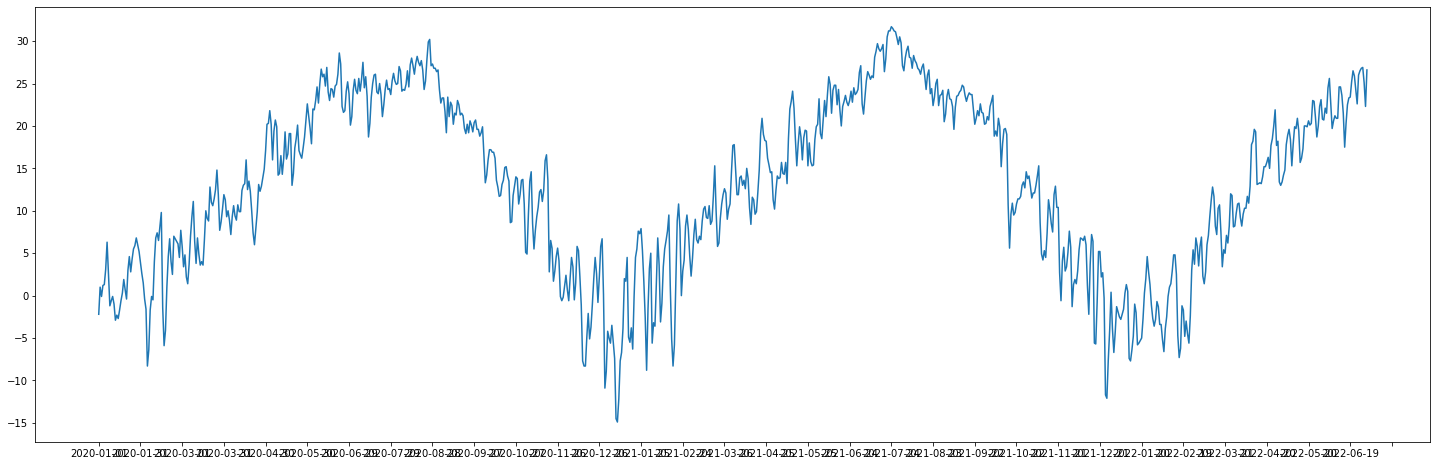

In [46]:
#그래프로 변환
fig, ax = plt.subplots(figsize=(25, 8))

ax.set_xticks(np.arange(0, 999, 30))
ax.set_yticks(range(-20, 40, 5))
ax.plot(df_avgTa)

plt.show()

이동 평균(Moving Average, MA)

시계열 데이터는 다음과 같은 특성이 있다고 가정
  - 추세(Trend): 데이터가 장기적으로 증가하거나 감소
  - 계절(Seasonality) : 데이터가 특정 주기로 증가하거나 감소
  - 주기(Cycle) : 계절성보다 더 긴 주기로 증가하거나 감소


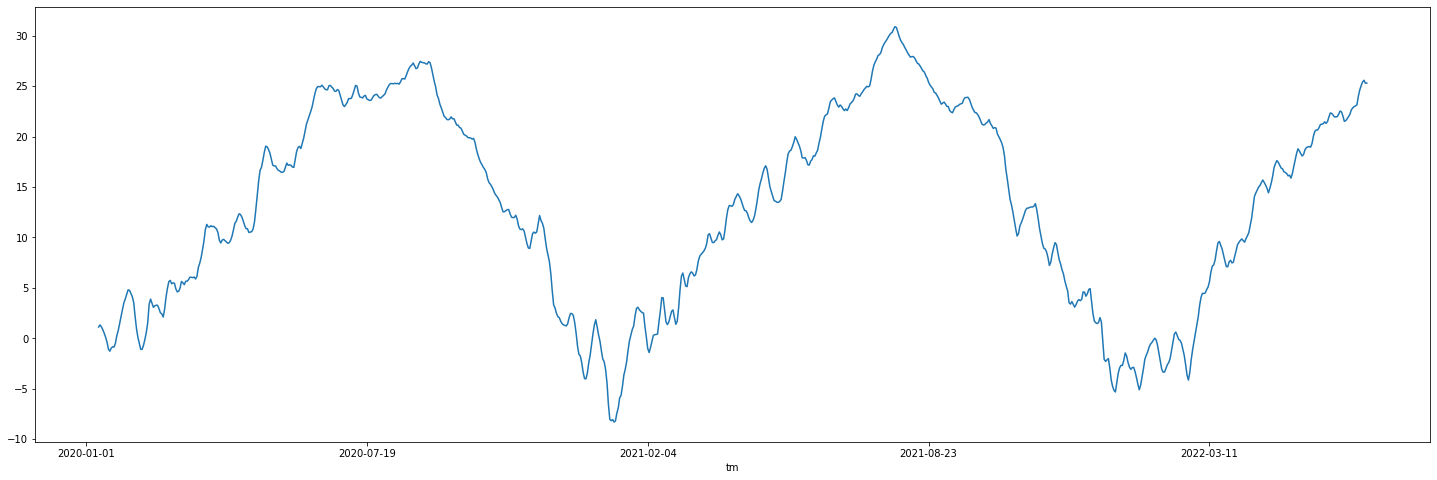

In [50]:
#메소드 rolling => 평활화(Smoothing)
fig, ax = plt.subplots(figsize=(25, 8))

#이동평균으로 그래프를 단순하게 그림, rolling으로 10개 단위의 평균 구함
df_avgTa['avgTa'].rolling(10).mean().plot(ax=ax)
plt.show()